In [20]:
import math
import vapory
from PIL import Image

In [12]:
def figure_from_line(l):
    return [tuple(int(d) for d in fig) for fig in l.split(' ')]

In [60]:
def create_scene(moment, figure):
    angle = 2 * math.pi * moment / 360
    r_camera = 10
    camera = vapory.Camera('location', 
                           [r_camera * math.cos(angle), 
                            1.1*r_camera, 
                            r_camera * math.sin(angle)], 
                           'look_at', [0.0, -0.7, 0.0], 
                           'angle', 30)
    light1 = vapory.LightSource([2, 4, -3], 'color', [1, 1, 1], 'shadowless')
    light2 = vapory.LightSource([2, 4, 3], 'color', [1, 1, 1], 'shadowless')
    plane = vapory.Plane([0, 1, 0], -2, vapory.Pigment('color', [1, 1, 1]))
    # boxes = [vapory.Box([x-0.5, z-0.5, y-0.5], 
    #                     [x+0.5, z+0.5, y+0.5], 
    #                  vapory.Pigment('Col_Glass_Clear'),
    #                  vapory.Finish('F_Glass9'),
    #                  vapory.Interior('I_Glass1')) for (x, y, z) in figure]
    boxes = [vapory.Box([x-0.5, z-0.5, y-0.5], 
                        [x+0.5, z+0.5, y+0.5], 
                     vapory.Texture(vapory.Pigment('color', [1, 1, 0]))
                     ) for (x, y, z) in figure]
    # spheres = [vapory.Sphere( [float(r[0]), float(r[1]), float(r[2])], 0.005, vapory.Texture(vapory.Pigment('color', [1, 1, 0]))) for r in X]
    return vapory.Scene(camera, objects=[light1, light2, plane] + boxes, included=['glass.inc'])

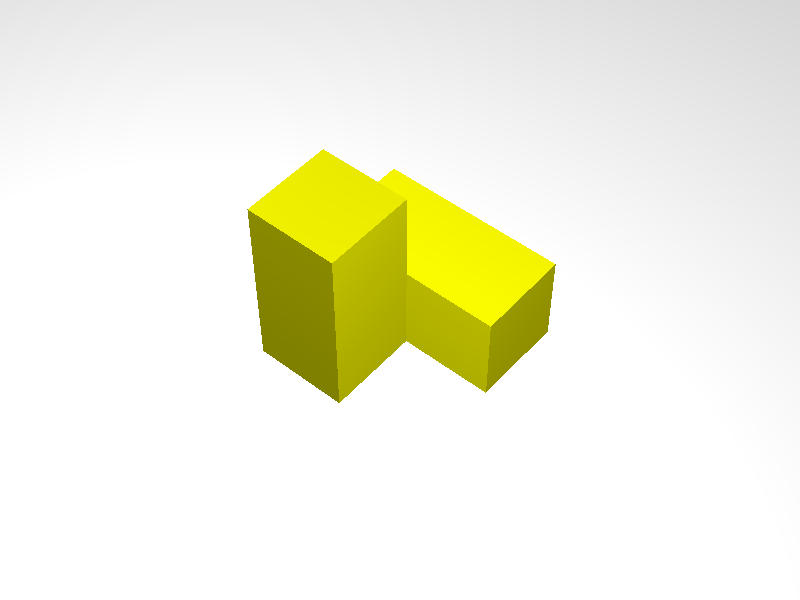

In [70]:
ind = 13
with open('/home/tass/prj/penta/penta.txt') as f:
    figures = [figure_from_line(l.strip()) for l in f]
scene = create_scene(40, figures[ind - 1])
pic_flnm = 'fig_{:02d}.png'.format(ind)
pic = scene.render(pic_flnm, width=800, height=600)
display(Image.open(pic_flnm))